In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:

import pandas as pd
import numpy as np
import tensorflow as tf
import os
import cv2
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
import random

from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop,Adam
from sklearn.model_selection import train_test_split
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
from tensorflow.keras import layers
opt = keras.optimizers.Adam(learning_rate=0.0001)

2.3.0


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Dataset/chest_xray"
os.listdir(path)

['.DS_Store', 'test', 'train', 'val']

In [ ]:
#IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Dataset/chest_xray/train'
valid_path = '/content/drive/MyDrive/Dataset/chest_xray/test'

In [ ]:


# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
from tensorflow.keras.applications.resnet50 import ResNet50
#resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)



In [ ]:
pretrained_model2 = ResNet50(weights= 'imagenet', include_top=False, input_shape= (224,224,3))

#freazing the trained layers
for layers in pretrained_model2.layers:
    layers.trainable = False
#pretrained_model3.summary()

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
import os 
import zipfile 
import tensorflow as tf 
from tensorflow.keras.optimizers import RMSprop 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
from tensorflow.keras.applications.inception_v3 import InceptionV3 
from tensorflow.keras.optimizers import RMSprop 
last_layer=pretrained_model2.get_layer('conv5_block3_1_relu')
last_output = last_layer.output

x=tf.keras.layers.Flatten()(last_output)
x=tf.keras.layers.Dense(1024,activation='relu')(x)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(256,activation='relu')(x)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(1,activation='sigmoid')(x)

model2=tf.keras.Model(pretrained_model2.input,x)

model2.compile(optimizer=RMSprop(lr=0.0001),
       #(lr=0.0001),
              loss='binary_crossentropy',
               metrics=['accuracy','Precision','Recall'])

#model3.summary()

In [ ]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Dataset/chest_xray/*')
folders

['/content/drive/MyDrive/Dataset/chest_xray/test',
 '/content/drive/MyDrive/Dataset/chest_xray/train',
 '/content/drive/MyDrive/Dataset/chest_xray/val']

In [ ]:
# Use the Image Data Generator to import the images from the dataset
#from tensorflow.keras.preprocessing.image import ImageDataGenerator

#train_datagen = ImageDataGenerator(rescale = 1./255,
   #                                shear_range = 0.2,
  #                                 zoom_range = 0.2,
 #                                  horizontal_flip = True)

#test_datagen = ImageDataGenerator(rescale = 1./255)


train_datagen2=ImageDataGenerator(rescale=1.0/255,
                                 rotation_range=30,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 zoom_range=0.2,
                                 )

val_datagen2=ImageDataGenerator(rescale=1.0/255)

test_datagen2=ImageDataGenerator(rescale=1.0/255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
val_generator2=val_datagen2.flow_from_directory('/content/drive/MyDrive/Dataset/chest_xray/val',
                                               target_size=(224,224),
                                                  batch_size=50,
                                                class_mode='binary')

training_set = train_datagen2.flow_from_directory('/content/drive/MyDrive/Dataset/chest_xray/train',
                                                 target_size = (224,224),
                                                 batch_size = 50,
                                                 class_mode = 'binary')

Found 16 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.


In [ ]:
test_set = test_datagen2.flow_from_directory('/content/drive/MyDrive/Dataset/chest_xray/test',
                                            target_size = (224,224),
                                            batch_size = 50,
                                            class_mode = 'binary')

Found 624 images belonging to 2 classes.


In [ ]:


# fit the model
# Run the cell. It will take some time to execute
#r = model.fit_generator(
  #training_set,
  #validation_data=test_set,
  #epochs=20,
  #steps_per_epoch=len(training_set),
 # validation_steps=len(test_set)
#)

history2=model2.fit_generator(training_set,validation_data=val_generator2,
                              #steps_per_epoch = 100, 
                                 epochs = 20, 
                               #validation_steps = 50,
                                   verbose=2)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
105/105 - 1596s - loss: 0.5864 - accuracy: 0.7358 - precision: 0.7440 - recall: 0.9825 - val_loss: 1.0297 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/20
105/105 - 110s - loss: 0.5552 - accuracy: 0.7423 - precision: 0.7436 - recall: 0.9969 - val_loss: 0.7709 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/20
105/105 - 109s - loss: 0.5140 - accuracy: 0.7477 - precision: 0.7567 - recall: 0.9734 - val_loss: 0.6831 - val_accuracy: 0.5625 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 4/20
105/105 - 109s - loss: 0.4852 - accuracy: 0.7588 - precision: 0.7786 - recall: 0.9437 - val_loss: 0.5469 - val_accuracy: 0.6875 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 5/20
105/105 - 109s - loss: 0.4573 - accuracy: 0.7682 - precision: 0.7970 - recall: 0.9231 - val_loss: 0.6805 - val_accuracy: 0.5625 - val_precision: 0.5333 - val_recall: 1.0000
Epo

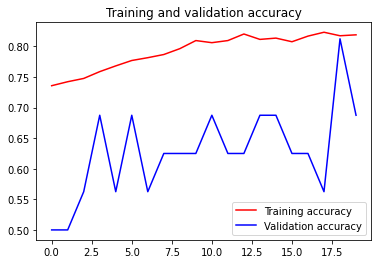

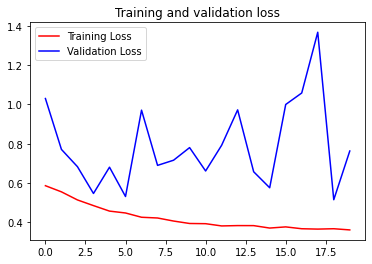

In [ ]:
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']


loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
epochs = range(len(acc2))

plt.plot(epochs, acc2, 'r', label='Training accuracy')
plt.plot(epochs, val_acc2, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()



plt.plot(epochs, loss2, 'r', label='Training Loss')
plt.plot(epochs, val_loss2, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show() 

In [ ]:
eval_result2 = model2.evaluate_generator(test_set, 624)
print('loss  :', eval_result2[0])
print('accuracy  :', eval_result2[1])
print('Precision :', eval_result2[2])
print('Recall :', eval_result2[3])


print('F1-score:', (2*eval_result2[2]*eval_result2[3]/(eval_result2[2]+eval_result2[3])))


Instructions for updating:
Please use Model.evaluate, which supports generators.
loss  : 0.44030898809432983
accuracy  : 0.8365384340286255
Precision : 0.8444976210594177
Recall : 0.9051281809806824
F1-score: 0.8737623721606563


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
pretrained_model3=InceptionV3(input_shape=(229,229,3),
                             include_top=False,
                             weights='imagenet')
#freazing the trained layers
for layers in pretrained_model3.layers:
    layers.trainable=False

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
last_layer=pretrained_model3.get_layer('mixed10')
last_output = last_layer.output

In [ ]:
x=tf.keras.layers.Flatten()(last_output)
x=tf.keras.layers.Dense(1024,activation='relu')(x)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(256,activation='relu')(x)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(1,activation='sigmoid')(x)

model3=tf.keras.Model(pretrained_model3.input,x)

model3.compile(optimizer=opt,
              loss='binary_crossentropy',
               metrics=['accuracy','Precision','Recall'])
# model4.summary()

In [ ]:
history3=model3.fit(training_set,validation_data=val_generator2,epochs=20,verbose=2)

Epoch 1/20
105/105 - 103s - loss: 0.4918 - accuracy: 0.8518 - precision: 0.8961 - recall: 0.9055 - val_loss: 0.5876 - val_accuracy: 0.7500 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 2/20
105/105 - 103s - loss: 0.2406 - accuracy: 0.9055 - precision: 0.9314 - recall: 0.9422 - val_loss: 0.3508 - val_accuracy: 0.8125 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 3/20
105/105 - 103s - loss: 0.2011 - accuracy: 0.9158 - precision: 0.9380 - recall: 0.9494 - val_loss: 0.2694 - val_accuracy: 0.8125 - val_precision: 0.8571 - val_recall: 0.7500
Epoch 4/20
105/105 - 103s - loss: 0.1817 - accuracy: 0.9316 - precision: 0.9513 - recall: 0.9569 - val_loss: 0.2764 - val_accuracy: 0.9375 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 5/20
105/105 - 103s - loss: 0.1823 - accuracy: 0.9247 - precision: 0.9469 - recall: 0.9520 - val_loss: 0.2951 - val_accuracy: 0.8750 - val_precision: 0.8750 - val_recall: 0.8750
Epoch 6/20
105/105 - 101s - loss: 0.1745 - accuracy: 0.9333 - precision: 0.9530 

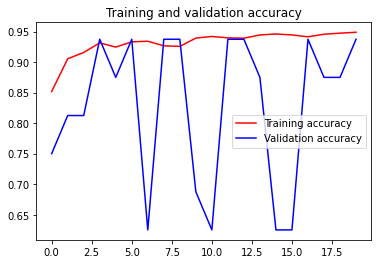

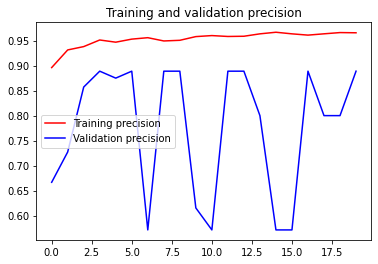

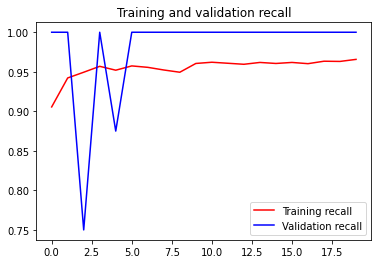

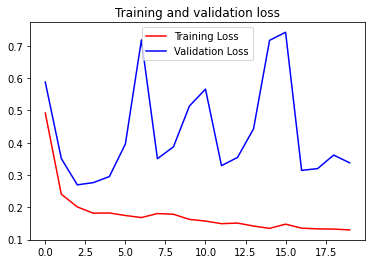

In [ ]:
acc3 = history3.history['accuracy']
val_acc3 = history3.history['val_accuracy']

train_precision3=history3.history['precision']
val_precision3=history3.history['val_precision']

train_recall3=history3.history['recall']
val_recall3=history3.history['val_recall']

loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']
epochs = range(len(acc3))

plt.plot(epochs, acc3, 'r', label='Training accuracy')
plt.plot(epochs, val_acc3, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, train_precision3, 'r', label='Training precision')
plt.plot(epochs, val_precision3, 'b', label='Validation precision')
plt.title('Training and validation precision')
plt.legend()
plt.show()

plt.plot(epochs, train_recall3, 'r', label='Training recall')
plt.plot(epochs, val_recall3, 'b', label='Validation recall')
plt.title('Training and validation recall')
plt.legend()
plt.show()

plt.plot(epochs, loss3, 'r', label='Training Loss')
plt.plot(epochs, val_loss3, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
eval_result3 = model3.evaluate_generator(test_set, 624)
print('loss  :', eval_result3[0])
print('accuracy  :', eval_result3[1])
print('Precision :', eval_result3[2])
print('Recall :', eval_result3[3])


print('F1-score:', (2*eval_result3[2]*eval_result3[3]/(eval_result3[2]+eval_result3[3])))


loss  : 0.2951642572879791
accuracy  : 0.875
Precision : 0.8661971688270569
Recall : 0.9461538195610046
F1-score: 0.9044117447775127


In [ ]:
import pandas as pd
import numpy as np
import os, cv2, random, pickle
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [ ]:
size = 224
training_data = []

In [ ]:
#create import function 
def image_import (img_path, class_type, appended_list):
    for i in os.listdir(img_path):
        read_path = os.path.join(img_path, i)
        try:
            img = cv2.imread(read_path)
            img = cv2.resize(img, (size, size))
            appended_list.append([img, class_type])
        except Exception as e:
            print(f'Image error: {i}')
            pass

In [ ]:
#import pneumonia images
img_path = '/content/drive/MyDrive/Dataset/chest_xray/train/PNEUMONIA'
image_import(img_path,1, training_data)

Image error: .DS_Store


In [ ]:
#import normal lung images
img_path = '/content/drive/MyDrive/Dataset/chest_xray/train/NORMAL'
image_import(img_path, 0, training_data)

Image error: .DS_Store


In [ ]:
#shuffle training data
random.shuffle(training_data)

In [ ]:
#seperate XY
features = []
targets = []

for f, t in training_data:
    features.append(f)
    targets.append(t)

X = np.array(features).reshape(-1, size, size, 3)
Y = np.array(targets)

In [ ]:
datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False,
        validation_split=0.2,
        brightness_range=[0.2,1.0],)
test_img = datagen.flow(
    X,
    Y,
    subset="training")
val_img = datagen.flow(
    X,
    Y,
    subset="validation")

In [ ]:
#MobileNetV2 model
base_model=tf.keras.applications.MobileNetV2(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3),
    pooling=max,
    classifier_activation="softmax",
)
base_model.trainable = False

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
#build model
model = Sequential()
model.add(base_model)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(1))    
model.add(Activation('sigmoid'))
model.summary()
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 1281      
_________________________________________________________________
activation_94 (Activation)   (None, 1)                 0         
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
#train model
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)
history4=model.fit(test_img, batch_size = 32, epochs = 30,validation_data = val_img)

Epoch 1/30
131/131 [==============================] - 59s 454ms/step - loss: 0.3615 - accuracy: 0.8411 - val_loss: 0.2297 - val_accuracy: 0.9204
Epoch 2/30
131/131 [==============================] - 58s 445ms/step - loss: 0.2238 - accuracy: 0.9101 - val_loss: 0.1912 - val_accuracy: 0.9310
Epoch 3/30
131/131 [==============================] - 60s 456ms/step - loss: 0.1830 - accuracy: 0.9319 - val_loss: 0.1767 - val_accuracy: 0.9291
Epoch 4/30
131/131 [==============================] - 60s 455ms/step - loss: 0.1725 - accuracy: 0.9310 - val_loss: 0.1570 - val_accuracy: 0.9453
Epoch 5/30
131/131 [==============================] - 59s 449ms/step - loss: 0.1585 - accuracy: 0.9406 - val_loss: 0.1682 - val_accuracy: 0.9425
Epoch 6/30
131/131 [==============================] - 58s 444ms/step - loss: 0.1558 - accuracy: 0.9413 - val_loss: 0.1543 - val_accuracy: 0.9444
Epoch 7/30
131/131 [==============================] - 58s 445ms/step - loss: 0.1605 - accuracy: 0.9329 - val_loss: 0.1395 - val_ac

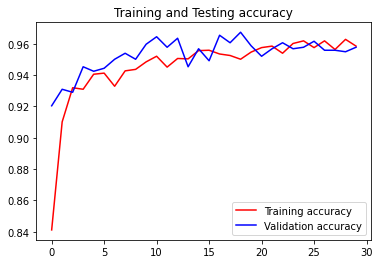

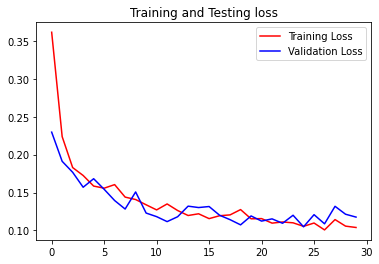

In [ ]:
acc4 = history4.history['accuracy']
val_acc4 = history4.history['val_accuracy']

loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']
epochs = range(len(acc4))

plt.plot(epochs, acc4, 'r', label='Training accuracy')
plt.plot(epochs, val_acc4, 'b', label='Validation accuracy')
plt.title('Training and Testing accuracy')
plt.legend()
plt.show()



plt.plot(epochs, loss4, 'r', label='Training Loss')
plt.plot(epochs, val_loss4, 'b', label='Validation Loss')
plt.title('Training and Testing loss')
plt.legend()

plt.show()

In [ ]:
#save model
model.save('pneumonia_cnn.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: pneumonia_cnn.model/assets


In [ ]:
#import pneumonia testng data
img_path = '/content/drive/MyDrive/Dataset/chest_xray/test/PNEUMONIA'
testing_data=[]
image_import(img_path, 1, testing_data)

In [ ]:
#import normal lung testing data
img_path = '/content/drive/MyDrive/Dataset/chest_xray/test/NORMAL'
image_import(img_path,0, testing_data)

In [ ]:
#shuffle training_data
random.shuffle(testing_data)

In [ ]:
#seperate testing to XY
test_features = []
test_targets = []

for f, t in testing_data:
    test_features.append(f)
    test_targets.append(t)

test_features = np.array(test_features).reshape(-1, size, size, 3)
test_targets = np.array(test_targets)   
test_features = test_features/255

In [ ]:
#confusion matrix calculation
false_negative = 0
false_positive = 0
true_negative = 0
true_positive = 0

result = model.predict_classes(test_features)
accuracy = model.evaluate(test_features,test_targets)[1]

for i in range(len(test_features)):
    if test_targets[i] == 1:
        if result[i] == 1:
            true_positive += 1
        elif result[i] == 0: 
            false_negative += 1
        else:
            print('error class not found')
    if test_targets[i] == 0:
        if result[i] == 1:
            false_positive += 1
        elif result[i] == 0: 
            true_negative += 1
        else:
            print('error class not found')
            

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
20/20 [==============================] - 1s 38ms/step - loss: 0.2176 - accuracy: 0.9071


In [ ]:
#create confusion matrix data
test_result = [false_negative,
               true_negative,
              true_positive,
               false_positive]
adjusted_test_result = np.array(test_result)/(len(test_features))
df_test_result = pd.DataFrame(np.array(['false_negative','true_negative','true_positive','false_positive']),columns=['results'])
df_test_result['percent'] = adjusted_test_result
df_test_result

,results,percent
0,false_negative,0.028846
1,true_negative,0.310897
2,true_positive,0.596154
3,false_positive,0.064103


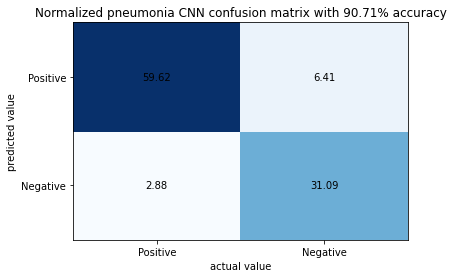

In [ ]:
#confusion matrix plot 
fig,ax = plt.subplots()
heatmap = ax.pcolor((df_test_result['percent'].to_numpy().reshape(2,2)),cmap='Blues')
data = df_test_result['percent'].to_numpy().reshape(2,2)* 100
for y in range(data.shape[0]):
    for x in range(data.shape[1]):
        ax.text(x + 0.5, y + 0.5, '%.2f' % data[y, x],
                 horizontalalignment='center',
                 verticalalignment='center',
                 )
ax.set_xticks([0.5,1.5])
ax.set_yticks([0.5,1.5])
ax.set_xticklabels(['Positive','Negative'])
ax.set_yticklabels(['Negative','Positive'])
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.title('Normalized pneumonia CNN confusion matrix with %.2f' %(accuracy*100)+ '% accuracy')
plt.savefig('90_87_model.png')
plt.show()
